<a href="https://colab.research.google.com/github/ikanx101/G-Colab/blob/main/3_Kelas_Mbak_May.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
# Dimulai dari hati yang bersih
rm(list=ls())
# Memanggil library
library(dplyr)
library(readxl)
library(ggplot2)
# Nama file
file = "1 SKU aktif.xlsx"

In [66]:
# Import file
# Saya exclude baris Grand Total dari data
data = read_excel(file) %>% filter(!grepl("total",SKU,ignore.case = T))
# Membuat colnames jadi lower semua biar gampang
colnames(data) = tolower(colnames(data))
# Cek struktur data
str(data)
# Lihat sampel 10 data teratas
head(data,10)

tibble [423 × 4] (S3: tbl_df/tbl/data.frame)
 $ sku             : chr [1:423] "(B)(R)2104523105" "(B)(R)2104523105P5" "(B)1101182250" "(B)1101686036" ...
 $ doi21hari       : num [1:423] 235 102 0 113 0 ...
 $ doianomali21hari: num [1:423] 0 0 12 0 0 0 0 0 0 0 ...
 $ sku.id          : num [1:423] NA NA NA NA NA NA NA NA NA NA ...


sku,doi21hari,doianomali21hari,sku.id
<chr>,<dbl>,<dbl>,<dbl>
(B)(R)2104523105,234.652174,0,NA
(B)(R)2104523105P5,101.804348,0,NA
(B)1101182250,0.000000,12,NA
(B)1101686036,112.989130,0,NA
(B)2102501125,0.000000,0,NA
(B)71210092,4.336957,0,NA
(B)71210138,0.000000,0,NA
(B)71210140,24.880435,0,NA
(B)71210151,40.858696,0,NA


# ***Problem Statement***

Pada kolom kedua di _file_ tersebut ( variabel `doi21hari`), apakah kita bisa membaginya ke dalam tiga kelas:

1. Low
1. Medium
1. High

Berdasarkan pembagian interval statistik?

# ***Solution***

Di __R__ kita bisa langsung menggunakan _function_ `cut()` dengan `breaks = 3` untuk membagi data numerik menjadi 3 kelas.

# __Sebelum Melakukan__ ___cut()___

Nah, sebelum kita melakukan `cut()`, ada baiknya kita melihat terlebih dahulu persebaran data yang ada. Saya akan buat boxplot dari data tersebut:

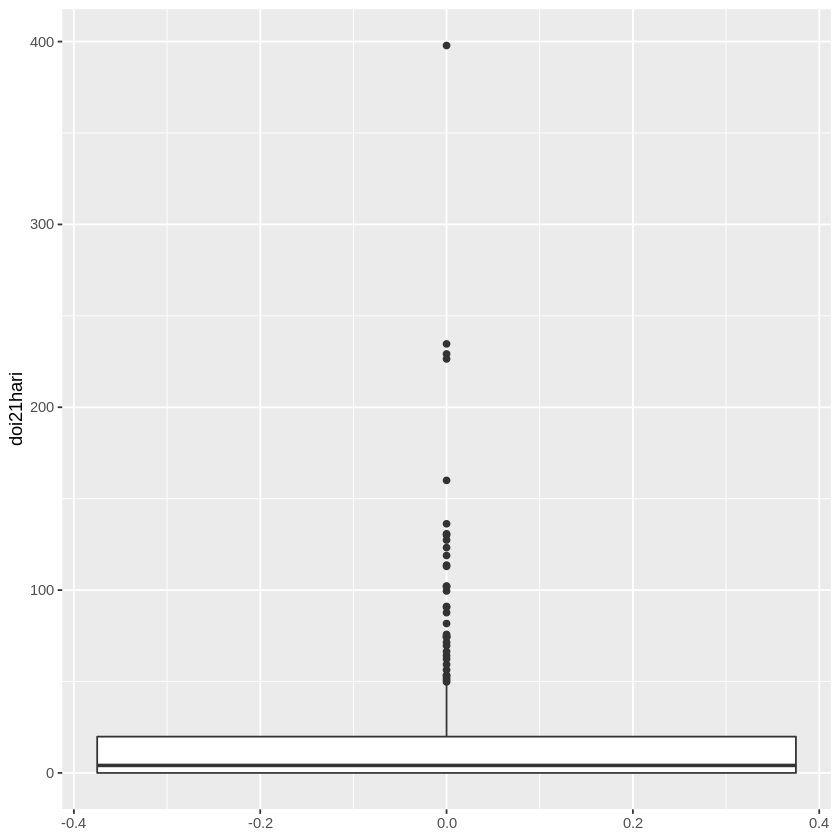

In [67]:
# Sebelumnya, mari kita cek dulu persebaran dari data `doi21hari`
# Saya akan buat boxplotnya dulu
data %>%
  ggplot(aes(y = doi21hari)) + geom_boxplot()

# __Temuan__

Terlihat dari boxplot di atas bahwa ada beberapa data yang menjadi _extreme values_. Tentunya hal ini akan membuat pengelompokkan menjadi tidak tepat.

Lalu bagaimana? Saya akan membagi data menjadi dua:

1. Data-data yang memiliki nilai di luar boxplot, yakni yang memiliki nilai di atas garis lurus. Kelak data ini akan saya beri label `extremely high`.
1. Data-data yang masih berada di boxplot. Kelak data ini yang akan saya bagi menjadi 3 kelas (low, med, high).

In [68]:
# Saya pisah dulu
# Batas garisnya ada di ~49 
data_1 = data %>% filter(doi21hari > 49)
data_2 = data %>% filter(doi21hari <= 49)

In [69]:
# kita set label untuk data_1
data_1 = 
  data_1 %>%
  mutate(kat_doi = "extremely high")
head(data_1)

sku,doi21hari,doianomali21hari,sku.id,kat_doi
<chr>,<dbl>,<dbl>,<dbl>,<chr>
(B)(R)2104523105,234.65217,0,NA,extremely high
(B)(R)2104523105P5,101.80435,0,NA,extremely high
(B)1101686036,112.98913,0,NA,extremely high
(E)1101685318,130.10870,0,NA,extremely high
1101569326,53.41304,0,600906296,extremely high
1101569326P4,74.18478,0,508430210,extremely high


In [70]:
# sekarang kita set label untuk data_2
# berdasarkan function cut()
data_2 = 
  data_2 %>%
  mutate(kat_doi = cut(doi21hari,
                       breaks = 3,
                       labels = c("low","med","high")),
         kat_doi = as.character(kat_doi)
        )
head(data_2,20)
table(data_2$kat_doi)

sku,doi21hari,doianomali21hari,sku.id,kat_doi
<chr>,<dbl>,<dbl>,<dbl>,<chr>
(B)1101182250,0.0000000,12.000000,NA,low
(B)2102501125,0.0000000,0.000000,NA,low
(B)71210092,4.3369565,0.000000,NA,low
(B)71210138,0.0000000,0.000000,NA,low
(B)71210140,24.8804348,0.000000,NA,med
(B)71210151,40.8586957,0.000000,NA,high
(E)2101481443P3,36.0652174,0.000000,NA,high
(R)1101989453,44.5108696,0.000000,NA,high
(R)2306592173P2,0.4565217,138.923077,NA,low



high  low  med 
  32  297   57 

# ___Conclusion___

Setelah itu, langkah akhir yang perlu dilakukan adalah menggabungkan antara `data_1` dan `data_2` dengan _function_ `rbind()`.

In [72]:
# Gabung data
data_final = rbind(data_1,data_2)
write.csv(data_final,"hasil pengelompokkan.csv")

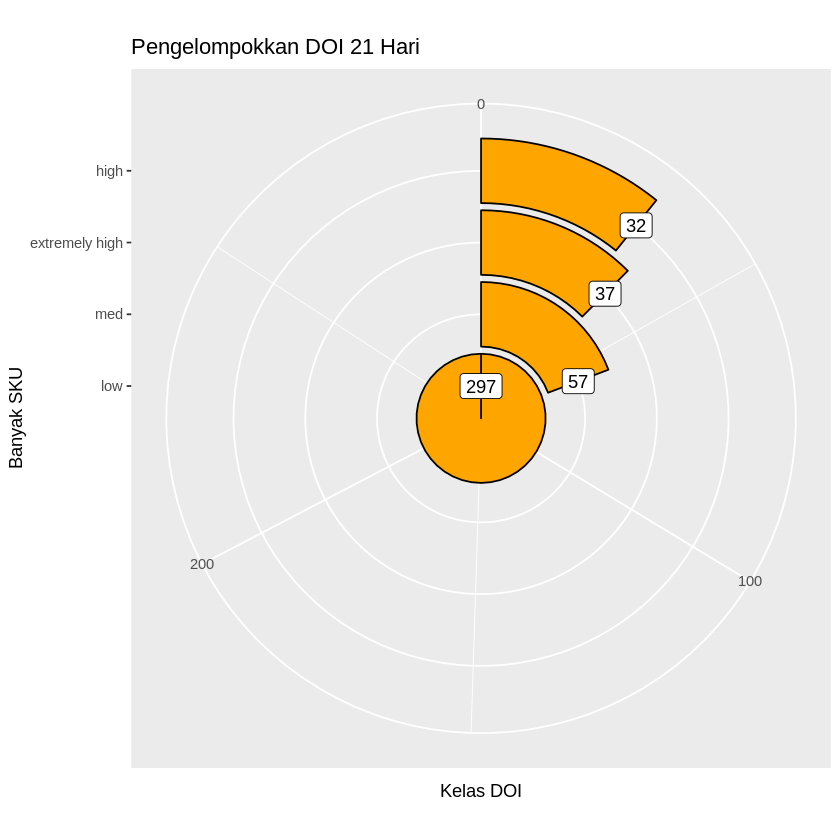

In [84]:
# Visualisasi
data_final %>%
  group_by(kat_doi) %>%
  summarise(freq = n()) %>%
  ungroup() %>%
  ggplot(aes(x = reorder(kat_doi,-freq),
             y = freq)) +
  geom_col(color = "black",fill = "orange") +
  geom_label(aes(label = freq)) +
  coord_polar(theta = "y") +
  labs(title = "Pengelompokkan DOI 21 Hari",
       y = "Kelas DOI",
       x = "Banyak SKU")